# In this notebook I will explore the use of k-means clustering on datasets

## Initialising libraries

In [3]:
# importing basic libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt # plotting library
%matplotlib inline

# importing k-means specific libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

print('Libraries imported.')

Libraries imported.


### Let's create a random seed

In [4]:
np.random.seed(0)

We want to create some random clusters in order to experiment with k-means clustering...  
Therefore we use the "make_blobs" class

Imput parameters:  
  
- n_samples: 3000 samples  
- centers: we predifine some centers
- cluster std deviation: 0,9  

Output:  

- X: an array of shape: [n_samples, n_fearures] (feature matrix)
- y: an array of shape: [n_samples] (response vector)



In [20]:
X,y = make_blobs(n_samples=3000, centers=[[-3,4],[-3,-3],[2,-3],[3,5],[0,0]],cluster_std=0.9)

Ok lets quickly visualise what we made!

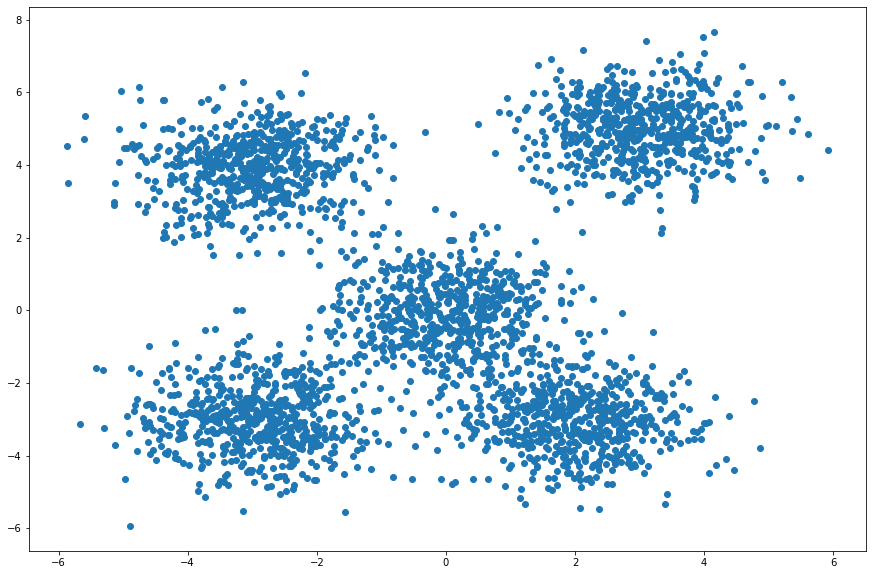

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1])

## The next step is putting K-means to work to do the clustering  


Parameters to use:  

- init: initialization method for the centroids. k-means++ uses smart choises of centroids to speed up convergence

- n_clusers: the number of clusters to form

- n_init: number of iteration to run with different chosen centroid seeds




In [71]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=12)

Fitting the model...

In [72]:
k_means.fit(X)

KMeans(n_clusters=5, n_init=12)

Getting the lables of 

In [73]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 3, 3, ..., 1, 2, 0], dtype=int32)

And.... the coordinates of the cluster centers

In [74]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-3.01700009,  3.92913161],
       [ 1.99048009, -3.05587643],
       [ 3.00503078,  5.00197112],
       [-2.94972534, -2.99678737],
       [ 0.00930863, -0.03762269]])

Great! we did the modeling. the last step of course is that we want to SEE what we have done.

### Visualizing the model

We can use matplotlib with "inline" backend to plot it within this notebook

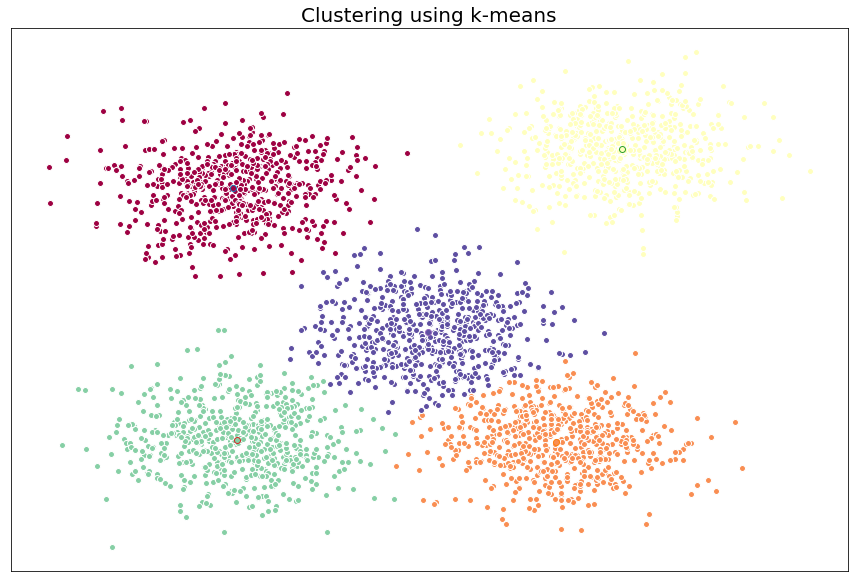

In [77]:
# initializing the plot 
fig = plt.figure(figsize=(15,10))
# create a plot
ax = fig.add_subplot(1,1,1)
# Create a title for the plot
ax.set_title('Clustering using k-means', fontsize=20)
# removing x and y axis ticks
ax.set_xticks(())
ax.set_yticks(())

# create a colormap fo display the data points within the clusters
# - np.linspace: creates an array of evenly spaced numbers over a specified interval
# - set create a 'set' object out of k_means_lables
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))


# create a loop throught the data with k goes from 0 - 4 for the five clusters
# - zip function is used to add two tuples to eachother
for k, col in zip(range(len([[-3,4],[-3,-3],[2,-3],[3,5],[0,0]])),colors):
    
    # create a list of all datapoints, where the datapoints that are in the cluster
    # are labeled true and the reset as false
    my_members = (k_means_labels == k)
    
    # define cluster center
    cluster_center = k_means_cluster_centers[k]
    
    # plot the data points with color col.
    ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.', markersize=12)
    
    #plot centroids
    ax.plot(cluster_center[0], cluster_center[1],'o',markerfacecolor=col,markersize=6)


